<a href="https://colab.research.google.com/github/Shubham-Patel22/Flipkart-CSAT-Classification/blob/main/Customer_Service_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Flipkart Customer Service Satisfaction



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

In the highly competitive e-commerce space, delivering excellent customer service is crucial for sustaining growth and customer loyalty. Flipkart, as one of the largest e-commerce platforms, focuses on enhancing customer satisfaction to differentiate itself from competitors. The dataset in this project captures customer interactions, feedback, and satisfaction scores across various support channels at Flipkart. By analyzing these interactions, the goal is to identify key drivers of customer satisfaction, understand performance across different customer service teams, and develop strategies to improve the overall service experience.

Understanding factors that influence customer satisfaction will allow Flipkart to not only resolve customer issues faster but also tailor its support strategies to meet diverse customer expectations. This will help in optimizing the performance of service agents and improving satisfaction metrics like the CSAT score, ultimately leading to increased brand loyalty and customer retention.

In this project, I will analyse factors that influence CSAT score and make models to predict CSAT score.

# **GitHub Link -**

[Flipkart CSAT Classification](https://github.com/Shubham-Patel22/Flipkart-CSAT-Classification)

# **Problem Statement**


To analyze the factors that affect Customer Satisfaction, measured by CSAT. And to make models for predicting CSAT scores. At last, to also give recommendations to improve CSAT score.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact of the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours, NeighbourhoodCleaningRule

### Dataset Loading

In [2]:
# Load Dataset
import gdown

link = 'https://drive.google.com/uc?id=1E9P_HFsoduV4EuYGYqjIY9ZCEck-sH7z'
gdown.download(link, 'Customer_support_data.csv', quiet=False)

cust_support_data = pd.read_csv('/content/Customer_support_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1E9P_HFsoduV4EuYGYqjIY9ZCEck-sH7z
To: /content/Customer_support_data.csv
100%|██████████| 20.2M/20.2M [00:00<00:00, 61.1MB/s]


### Dataset First View

In [3]:
# Dataset First Look
cust_support_data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
cust_support_data.shape

(85907, 20)

### Dataset Information

In [ ]:
# Dataset Info
cust_support_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
cust_support_data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_data = pd.DataFrame({'missing_count':cust_support_data.isnull().sum(), 'missing_percent':((cust_support_data.isnull().sum()/cust_support_data.shape[0])*100).round(2)})
missing_data

,missing_count,missing_percent
Unique id,0,0.00
channel_name,0,0.00
category,0,0.00
Sub-category,0,0.00
Customer Remarks,57165,66.54
Order_id,18232,21.22
order_date_time,68693,79.96
Issue_reported at,0,0.00
issue_responded,0,0.00
Survey_response_Date,0,0.00


In [ ]:
missing_data = missing_data.loc[missing_data['missing_count'] > 0]
missing_data

,missing_count,missing_percent
Customer Remarks,57165,66.54
Order_id,18232,21.22
order_date_time,68693,79.96
Customer_City,68828,80.12
Product_category,68711,79.98
Item_price,68701,79.97
connected_handling_time,85665,99.72


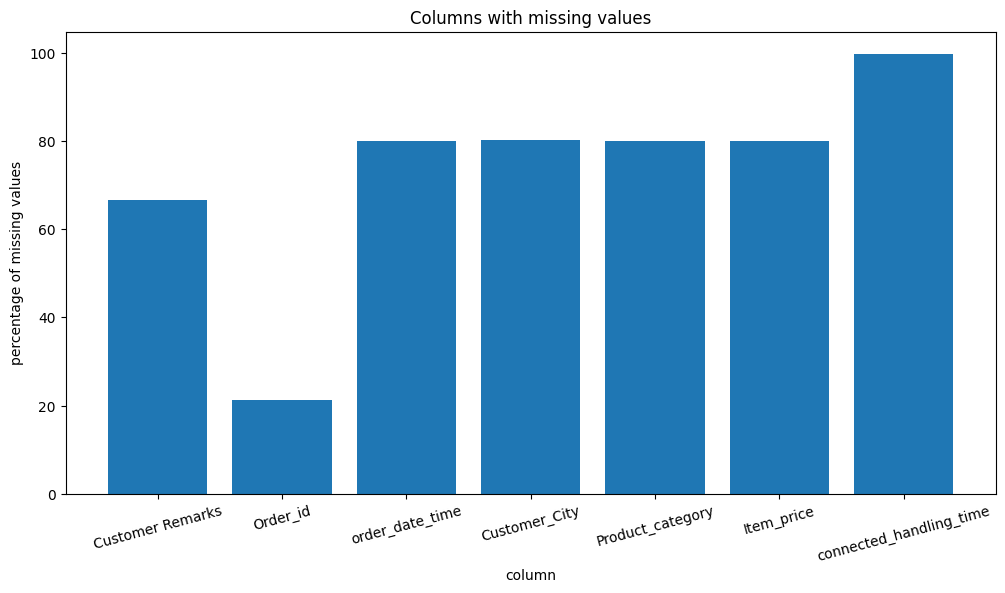

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12,6))
plt.bar(missing_data.index, missing_data.missing_percent)
plt.ylabel('percentage of missing values')
plt.xlabel('column')
plt.title('Columns with missing values')
plt.xticks(rotation = 15)
plt.show()

### What did you know about your dataset?

The data has 85907 and 20 columns. CSAT Score column is whole number. Item_price and connected_handling_time are float values. All the other 17 columns are strings. There are no duplicated rows. Only the columns 'Customer Remarks', Order_id, order_date_time, Customer_City, Product_category, Item_price and connected_handling_time have missing values. Order_id has a missing values percent of about 20%. The columns 'Customer Remarks', order_date_time, Customer_City, Product_category, Item_price and connected_handling_time have high missing value percents above 50%.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cust_support_data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
cust_support_data.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

* Unique id - Unique identifier for each record
* channel_name - Name of the customer service channel
* category - Category of the interaction
* Sub-category - Sub-category of the interaction
* Customer Remarks - Textual Feedback provided by the customer
* Order_id - Identifier for the order associated with the interaction
* Order_date_time - Date and time of the order
* Issue_reported at - Timestamp when the issue was reported
* Issue_responded - Timestamp when the issue was responded to
* Survey_response_date - Date of the customer survey response
* Customer_City - City of the customer
* Product_category - Category of the product
* Item_price - Price of the item
* connected_handling_time - Time taken to handle the interaction
* Agent_name - Name of the customer service agent
* Supervisor - Name of the supervisor
* Manager - Name of the manager
* Tenure Bucket - Bucket categorizing agent tenure
* Agent Shift - Shift timing of the agent
* CSAT Score - Customer Satisfaction (CSAT) score. It is a natural number ranging from 1 to 5.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
cust_support_data.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


There are records of 67675 orders. The customers are founded in 1782 cities. There are 1371 agents, 40 supervisors and 6 managers. The general hierarchical structure is one manager has 7 supervisors under him and a supervisor has 35 agents under him.

In [ ]:
cust_support_data['Product_category'].unique()

array([nan, 'LifeStyle', 'Electronics', 'Mobile', 'Home Appliences',
       'Furniture', 'Home', 'Books & General merchandise', 'GiftCard',
       'Affiliates'], dtype=object)

The product category has actually 8 unique values because one of the 9 values is nan(null).

In [ ]:
cust_support_data['Supervisor'].unique()

array(['Mason Gupta', 'Dylan Kim', 'Jackson Park', 'Olivia Wang',
       'Austin Johnson', 'Emma Park', 'Aiden Patel', 'Evelyn Kimura',
       'Nathan Patel', 'Amelia Tanaka', 'Harper Wong', 'Zoe Yamamoto',
       'Scarlett Chen', 'Sophia Sato', 'Wyatt Kim', 'Logan Lee',
       'Mia Patel', 'William Park', 'Emily Yamashita', 'Madison Kim',
       'Noah Patel', 'Oliver Nguyen', 'Elijah Yamaguchi',
       'Layla Taniguchi', 'Isabella Wong', 'Carter Park', 'Jacob Sato',
       'Ethan Tan', 'Mia Yamamoto', 'Brayden Wong', 'Ava Wong',
       'Landon Tanaka', 'Lucas Singh', 'Charlotte Suzuki',
       'Abigail Suzuki', 'Ethan Nakamura', 'Olivia Suzuki',
       'Alexander Tanaka', 'Lily Chen', 'Sophia Chen'], dtype=object)

In [ ]:
cust_support_data['Manager'].unique()

array(['Jennifer Nguyen', 'Michael Lee', 'William Kim', 'John Smith',
       'Olivia Tan', 'Emily Chen'], dtype=object)

In [ ]:
cust_support_data['Tenure Bucket'].unique()

array(['On Job Training', '>90', '0-30', '31-60', '61-90'], dtype=object)

In [ ]:
cust_support_data['Agent Shift'].unique()

array(['Morning', 'Evening', 'Split', 'Afternoon', 'Night'], dtype=object)

In [ ]:
cust_support_data['CSAT Score'].unique()

array([5, 4, 1, 3, 2])

In [ ]:
cust_support_data['channel_name'].unique()

array(['Outcall', 'Inbound', 'Email'], dtype=object)

In [ ]:
cust_support_data['category'].unique()

array(['Product Queries', 'Order Related', 'Returns', 'Cancellation',
       'Shopzilla Related', 'Payments related', 'Refund Related',
       'Feedback', 'Offers & Cashback', 'Onboarding related', 'Others',
       'App/website'], dtype=object)

In [ ]:
cust_support_data['Sub-category'].unique()

array(['Life Insurance', 'Product Specific Information',
       'Installation/demo', 'Reverse Pickup Enquiry', 'Not Needed',
       'Fraudulent User', 'Exchange / Replacement', 'Missing',
       'General Enquiry', 'Return request', 'Delayed',
       'Service Centres Related', 'Payment related Queries',
       'Order status enquiry', 'Return cancellation', 'Unable to track',
       'Seller Cancelled Order', 'Wrong', 'Invoice request',
       'Priority delivery', 'Refund Related Issues', 'Signup Issues',
       'Online Payment Issues', 'Technician Visit',
       'UnProfessional Behaviour', 'Damaged', 'Product related Issues',
       'Refund Enquiry', 'Customer Requested Modifications',
       'Instant discount', 'Card/EMI', 'Shopzila Premium Related',
       'Account updation', 'COD Refund Details', 'Seller onboarding',
       'Order Verification', 'Other Cashback', 'Call disconnected',
       'Wallet related', 'PayLater related', 'Call back request',
       'Other Account Related Issues

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
cust_support_data.loc[cust_support_data['Order_id'].isna()].head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
4562,bad02317-4a15-49ba-8d8a-b6f78b885254,Inbound,Order Related,Customer Requested Modifications,Bad behaviour rudely language and given wrong ...,NaN,NaN,03/08/2023 15:17,03/08/2023 15:19,03-Aug-23,NaN,NaN,NaN,NaN,Mackenzie Scott MD,Emma Park,John Smith,31-60,Morning,1
4564,5af6b107-d261-4b17-bd61-9b830360f362,Inbound,Offers & Cashback,Other Cashback,Thank you for your support.,NaN,NaN,03/08/2023 20:26,03/08/2023 20:32,03-Aug-23,NaN,NaN,NaN,NaN,Nancy Singh,Noah Patel,Emily Chen,>90,Split,5
4565,2e1a4f5c-a4ce-4da0-bfcc-19fd94a49e16,Inbound,Offers & Cashback,Affiliate Offers,NaN,NaN,NaN,03/08/2023 09:51,03/08/2023 16:00,03-Aug-23,NaN,NaN,NaN,NaN,Emily Mckenzie,Amelia Tanaka,Emily Chen,>90,Split,5
4566,e0dd445f-5198-4fac-8169-e09bcbb205de,Inbound,Product Queries,Life Insurance,Good luck of the day,NaN,NaN,03/08/2023 14:43,03/08/2023 14:47,03-Aug-23,NaN,NaN,NaN,NaN,James Mcgee,Madison Kim,John Smith,>90,Morning,5
4567,fba0a30e-4c83-47c2-8831-38d6c9b2b8c7,Inbound,Returns,Return request,NaN,NaN,NaN,03/08/2023 17:13,03/08/2023 19:25,03-Aug-23,NaN,NaN,NaN,NaN,Kelly Moore DDS,Isabella Wong,Emily Chen,>90,Evening,5


In [ ]:
cust_support_data.loc[cust_support_data['Product_category'].isna()].head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
cust_support_data.loc[cust_support_data['Product_category'].isna()].tail()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4
85906,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,NaN,3230db30-f8da-4c44-8636-ec76d1d3d4f3,NaN,31/08/2023 23:36,31/08/2023 23:37,31-Aug-23,NaN,NaN,NaN,NaN,Elizabeth Guerra,Nathan Patel,Jennifer Nguyen,On Job Training,Evening,5


In [ ]:
cust_support_data.loc[cust_support_data['Item_price'].isna()]#.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [ ]:
cust_support_data.loc[cust_support_data['Item_price'] == 0]

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
32198,9f9f447b-00d2-440c-bc6d-cb9ae1999afc,Inbound,Refund Related,Refund Related Issues,NaN,0a6a67e2-1810-4a15-b1b4-09f30a5edc67,05/08/2023 17:48,11/08/2023 18:50,11/08/2023 19:09,11-Aug-23,LUCKNOW,Books & General merchandise,0.0,NaN,Regina Harper,Harper Wong,William Kim,On Job Training,Evening,5


In [ ]:
# Write your code to make your dataset analysis ready.
analysis_data = cust_support_data.drop(columns = ['Unique id', 'order_date_time', 'Customer_City', 'Customer Remarks', 'connected_handling_time', 'Order_id', 'Product_category', 'Item_price', 'Agent_name', 'Supervisor', 'Manager'],
                                       axis = 1, inplace = False)

In [ ]:
analysis_data.rename(columns = {'Sub-category':'sub_category', 'Issue_reported at':'issue_reported', 'Survey_response_Date':'survey_response_date', 'Tenure Bucket':'tenure_bucket', 'Agent Shift':'agent_shift', 'CSAT Score':'csat_score'},
                     inplace = True)

In [ ]:
analysis_data['issue_reported'] = pd.to_datetime(analysis_data['issue_reported'], dayfirst=True)
analysis_data['issue_responded'] = pd.to_datetime(analysis_data['issue_responded'], dayfirst=True)

In [ ]:
analysis_data.head()

,channel_name,category,sub_category,issue_reported,issue_responded,survey_response_date,tenure_bucket,agent_shift,csat_score
0,Outcall,Product Queries,Life Insurance,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,On Job Training,Morning,5
1,Outcall,Product Queries,Product Specific Information,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,>90,Morning,5
2,Inbound,Order Related,Installation/demo,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,On Job Training,Evening,5
3,Inbound,Returns,Reverse Pickup Enquiry,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,>90,Evening,5
4,Inbound,Cancellation,Not Needed,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,0-30,Morning,5


In [ ]:
# Getting the response time in minutes
analysis_data['response_time'] = ((analysis_data['issue_responded'] - analysis_data['issue_reported']) / np.timedelta64(1, 'm')).astype(int)

In [ ]:
analysis_data['issue_responded'].dt.date

,issue_responded
0,2023-08-01
1,2023-08-01
2,2023-08-01
3,2023-08-01
4,2023-08-01
...,...
85902,2023-08-31
85903,2023-08-31
85904,2023-08-31
85905,2023-08-31


In [ ]:
analysis_data['survey_response_date'] = pd.to_datetime(analysis_data['survey_response_date'], dayfirst=True)

<ipython-input-33-6eb3ebb37b04>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  analysis_data['survey_response_date'] = pd.to_datetime(analysis_data['survey_response_date'], dayfirst=True)


In [ ]:
analysis_data['survey_latency'] = analysis_data['survey_response_date'] - pd.to_datetime(analysis_data['issue_responded'].dt.date)

In [ ]:
analysis_data['survey_latency'].value_counts()

,count
survey_latency,
0 days,85907


From the initial data wrangling and analysis, I found that all the surveys are taken the day, the customer service request is responded to. So, survey_latency and survey_response_date add no information. I will be removing these columns. I will also be removing issue_reported and issue_responded because they don't have an influence on csat_score individually but the varible response_time from them directly influnce csat_score. You can logically see it, lower response_time corresponds with higher csat_score.

In [ ]:
analysis_data.drop(columns = ['survey_latency', 'survey_response_date', 'issue_reported', 'issue_responded'], axis = 1, inplace = True)

In [ ]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_name   85907 non-null  object
 1   category       85907 non-null  object
 2   sub_category   85907 non-null  object
 3   tenure_bucket  85907 non-null  object
 4   agent_shift    85907 non-null  object
 5   csat_score     85907 non-null  int64 
 6   response_time  85907 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.6+ MB


In [ ]:
analysis_data.head()

,channel_name,category,sub_category,tenure_bucket,agent_shift,csat_score,response_time
0,Outcall,Product Queries,Life Insurance,On Job Training,Morning,5,34
1,Outcall,Product Queries,Product Specific Information,>90,Morning,5,2
2,Inbound,Order Related,Installation/demo,On Job Training,Evening,5,22
3,Inbound,Returns,Reverse Pickup Enquiry,>90,Evening,5,20
4,Inbound,Cancellation,Not Needed,0-30,Morning,5,2


In [ ]:
analysis_data.describe()

,csat_score,response_time
count,85907.000000,85907.000000
mean,4.242157,136.886610
std,1.378903,592.528551
min,1.000000,-1437.000000
25%,4.000000,2.000000
50%,5.000000,5.000000
75%,5.000000,35.000000
max,5.000000,5758.000000


In [ ]:
analysis_data.loc[analysis_data['response_time'] < 0, 'response_time']

,response_time
74172,-967
74173,-1016
74174,-1214
74175,-877
74176,-1406
...,...
77566,-805
77567,-1089
77568,-1340
77569,-878


In [ ]:
analysis_data.loc[analysis_data['response_time'] < 0, 'response_time'].value_counts()

,count
response_time,
-755,11
-709,10
-863,10
-1060,9
-1124,9
...,...
-821,1
-1353,1
-1132,1


Logically the response_time should not be less than 0 because it is defined as the time difference between issue_responded time and issue_reported time. You can't respond to an issue before it is reported. No body has this 6th sense. So, these values are inconsistent. I will not be removing these rows, but rather I will multiply the negative values in response_time with -1 to make them positive.

In [ ]:
analysis_data.loc[analysis_data['response_time'] < 0, 'response_time'] = analysis_data.loc[analysis_data['response_time'] < 0, 'response_time'] * -1

In [ ]:
analysis_data['response_time'].value_counts().sort_index()

,count
response_time,
0,2448
1,10975
2,10314
3,7582
4,5388
...,...
5729,1
5734,1
5737,1


The response time of 0 here will imply that the customer query has been answered within 1 minute. That is lighting fast. But in real world, the time between customer raising a query and customer service responding will be be positive non-zero. Since we are counting in minutes, it came to 0. The 0 response time makes it seem that the customer service responds to customer query instantly as soon as the customer raises query, which is not possible. To remove this inconsistency, I will change the response time to 1, wherever it is 0(It will mean that the customer query is responded to within 1 minute).

In [ ]:
analysis_data.loc[analysis_data['response_time'] == 0, 'response_time'] = 1

In [ ]:
analysis_data.shape

(85907, 7)

### What all manipulations have you done and insights you found?

I have made analysis_data a copy of cust_support_data where I have excluded the columns 'Unique id', 'order_date_time', 'Customer_City', 'Customer Remarks', 'connected_handling_time', 'Order_id', 'Product_category', 'Item_price', 'Agent_name', 'Supervisor' and 'Manager'.

In the analysis_data, I renamed the columns 'Sub-category' to 'sub_category', 'Issue_reported at' to 'issue_reported', 'Survey_response_Date' to 'survey_response_date', 'Tenure Bucket' to 'tenure_bucket', 'Agent Shift' to 'agent_shift' and 'CSAT Score' to 'csat_score'.

I derived the variable response_time from issue_responded and issue_reported which denotes the time taken in minutes to respond to an issue after it has been reported.

I made a derived variable survey_latency from survey_response_date and issue_responded which denotes the time taken in days by customer to submit survey response after his/her reported issue has been responded to. In the analysis, I found out that the day the customer issue is responded to, the survey is also conducted from the customer. So, survey_latency and survey_response_date don't give any valuable information. So, I removed them. I have also removed issue_reported and issue_responded because in place of them I have response_time which gives valuable information.

Also, I found that some rows have negative response_time which is inconsistent, so I removed those rows.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_name   85907 non-null  object
 1   category       85907 non-null  object
 2   sub_category   85907 non-null  object
 3   tenure_bucket  85907 non-null  object
 4   agent_shift    85907 non-null  object
 5   csat_score     85907 non-null  int64 
 6   response_time  85907 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.6+ MB


#### Chart - 1

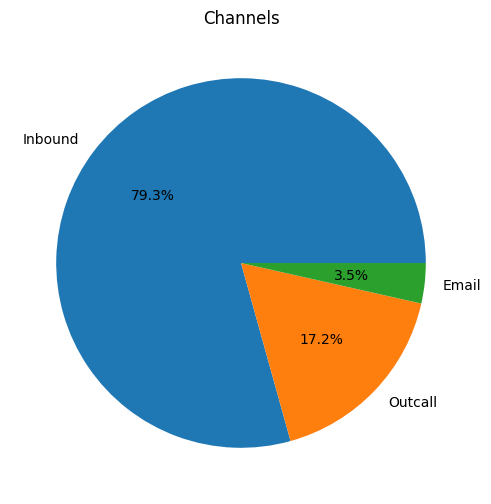

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (12,6))
plt.pie(analysis_data['channel_name'].value_counts(), labels = analysis_data['channel_name'].value_counts().index, autopct = '%1.1f%%')
plt.title('Channels')
plt.show()

##### 1. Why did you pick the specific chart?

To see the proportions of all customer service channels

##### 2. What is/are the insight(s) found from the chart?

Inbound is the most common channel followed by Outcall and the least common channel is Email.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight for the company.

#### Chart - 2

In [ ]:
categories_data = pd.DataFrame({'count':analysis_data['category'].value_counts(), 'cum_count':analysis_data['category'].value_counts().cumsum()})
categories_data['percent'] = ((categories_data['count'] / analysis_data.shape[0]) * 100).round(2)
categories_data['cum_percent'] = ((categories_data['cum_count'] / analysis_data.shape[0]) * 100).round(2)
categories_data

,count,cum_count,percent,cum_percent
category,,,,
Returns,44097,44097,51.33,51.33
Order Related,23215,67312,27.02,78.35
Refund Related,4550,71862,5.30,83.65
Product Queries,3692,75554,4.30,87.95
Shopzilla Related,2792,78346,3.25,91.20
Payments related,2327,80673,2.71,93.91
Feedback,2294,82967,2.67,96.58
Cancellation,2212,85179,2.57,99.15
Offers & Cashback,480,85659,0.56,99.71


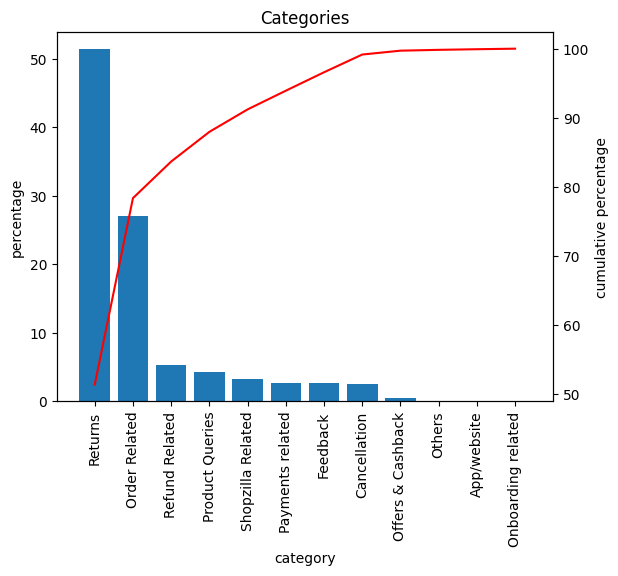

In [ ]:
# Chart - 2 visualization code
fig, ax = plt.subplots()
ax.bar(categories_data.index, categories_data['percent'])
ax.set_ylabel('percentage')
ax.set_xlabel('category')
ax.set_title('Categories')
ax.tick_params(axis = 'x', rotation = 90)

ax2 = ax.twinx()
ax2.plot(categories_data.index, categories_data['cum_percent'], color = 'red')
ax2.set_ylabel('cumulative percentage')

plt.show()

##### 1. Why did you pick the specific chart?

To see the percentages and cumulative percentages of categories.

##### 2. What is/are the insight(s) found from the chart?

Most of the issues are return related. The next big majority of issues are order related. The main problem is in return and order.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows the company that the majorly the issues are related to orders and returns.

#### Chart - 3

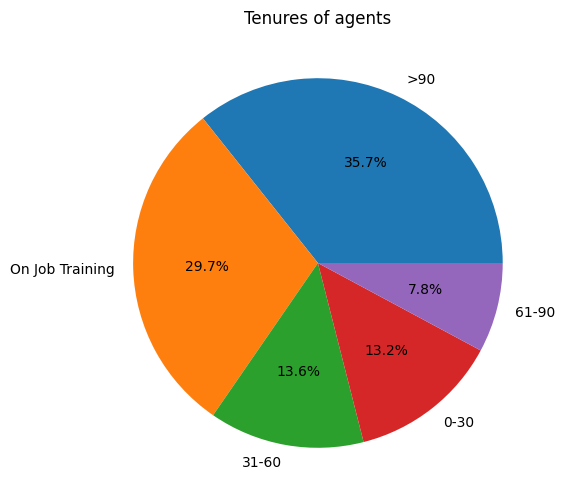

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (12,6))
plt.pie(analysis_data['tenure_bucket'].value_counts(), labels = analysis_data['tenure_bucket'].value_counts().index, autopct = '%1.1f%%')
plt.title('Tenures of agents')
plt.show()

##### 1. Why did you pick the specific chart?

To get information about tenures of agents.

##### 2. What is/are the insight(s) found from the chart?

Almost 1 third of the agents are more than 90 days, another third on job training and the last third have tenure from 0-90 days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These are informative insights that give company the idea of the tenures of its service agents.

#### Chart - 4

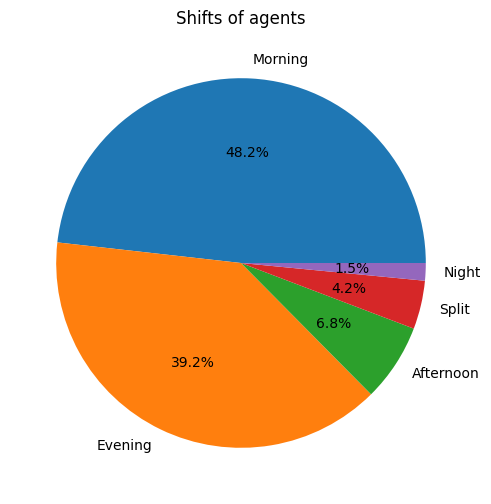

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (12,6))
plt.pie(analysis_data['agent_shift'].value_counts(), labels = analysis_data['agent_shift'].value_counts().index, autopct = '%1.1f%%')
plt.title('Shifts of agents')
plt.show()

##### 1. Why did you pick the specific chart?

To get an idea of when the service agents are most available.

##### 2. What is/are the insight(s) found from the chart?

Most of the agents are available in morning, followed by evening and afternoon. The agents are least available in night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight for the company.

#### Chart - 5

In [ ]:
analysis_data['csat_score'].value_counts()

,count
csat_score,
5,59617
1,11230
4,11219
3,2558
2,1283


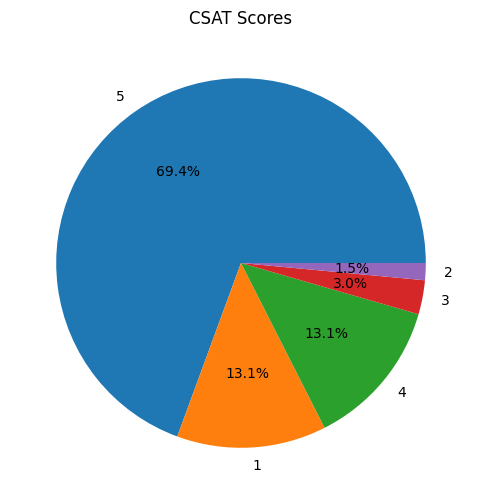

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (12,6))
plt.pie(analysis_data['csat_score'].value_counts(), labels = analysis_data['csat_score'].value_counts().index, autopct = '%1.1f%%')
plt.title('CSAT Scores')
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of CSAT Scores.

##### 2. What is/are the insight(s) found from the chart?

Most of the interactions are given CSAT score of 5 by the customer, which means in most cases, the issue is resolved and the customer has no complains. We need to focus on the cases where, we have not got 5 and see what shortcomings were in those cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight which gives the idea of CSAT score to the company.

#### Chart - 6

<ipython-input-54-a98c9a12837d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(analysis_data['response_time'], shade = True)


<Axes: xlabel='response_time', ylabel='Density'>

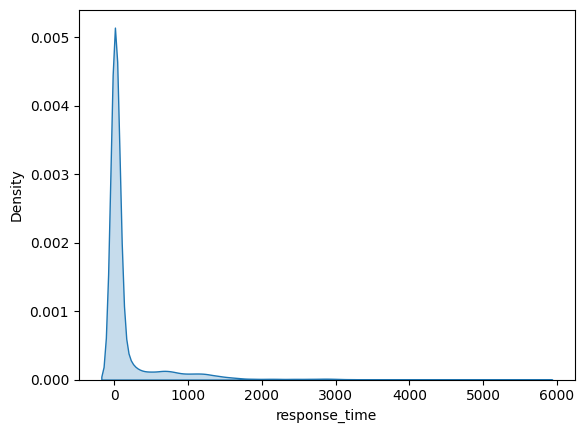

In [ ]:
# Chart - 6 visualization code
sns.kdeplot(analysis_data['response_time'], shade = True)

##### 1. Why did you pick the specific chart?

To see the distribution of response times.

##### 2. What is/are the insight(s) found from the chart?

The distribution of response times is skewed on the extreme end of low values. Its distribution seems to be log-normal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight which shows that the distribution of response times can be log-normal. This insight can be later useful in data pre-processing.

#### Chart - 7

In [ ]:
sub_categories_data = analysis_data.groupby('category')['sub_category'].value_counts()
sub_categories_data

category            sub_category                    
App/website         Issues with Shopzilla App              74
                    App/website Related                    10
Cancellation        Not Needed                           1920
                    Return cancellation                   292
Feedback            UnProfessional Behaviour             2294
Offers & Cashback   Other Cashback                        219
                    Affiliate Offers                      183
                    Instant discount                       78
Onboarding related  Seller onboarding                      62
                    Commission related                      3
Order Related       Delayed                              7388
                    Order status enquiry                 6922
                    Installation/demo                    4116
                    Invoice request                      1465
                    Seller Cancelled Order               1059
                    Priority delivery                     972
                    Customer Requested Modifications      805
                    General Enquiry                       252
                    Unable to track                       164
                    Order Verification                     72
Others              Call back request                      46
                    Call disconnected                      40
                    Others                                 12
                    Non Order related                       1
Payments related    Online Payment Issues                1079
                    Payment related Queries               743
                    Wallet related                        230
                    PayLater related                      140
                    Billing Related                        57
                    e-Gift Voucher                         42
                    Card/EMI                               19
                    Payment pending                        17
Product Queries     Product Specific Information         3589
                    Warranty related                       78
                    Life Insurance                         23
                    Policy Related                          2
Refund Related      Refund Enquiry                       2665
                    Refund Related Issues                1800
                    COD Refund Details                     85
Returns             Reverse Pickup Enquiry              22389
                    Return request                       8523
                    Fraudulent User                      4108
                    Wrong                                2597
                    Missing                              2556
                    Service Centres Related              1875
                    Exchange / Replacement                896
                    Damaged                               475
                    Technician Visit                      378
                    Product related Issues                183
                    Service Center - Service Denial        58
                    Self-Help                              49
                    General Enquiry                        10
Shopzilla Related   General Enquiry                      1683
                    Signup Issues                         489
                    Shopzila Premium Related              361
                    Account updation                      150
                    Shopzilla Rewards                      80
                    Other Account Related Issues           22
                    Unable to Login                         7
Name: count, dtype: int64

In [ ]:
sub_categories_data.info()

<class 'pandas.core.series.Series'>
MultiIndex: 59 entries, ('App/website', 'Issues with Shopzilla App') to ('Shopzilla Related', 'Unable to Login')
Series name: count
Non-Null Count  Dtype
--------------  -----
59 non-null     int64
dtypes: int64(1)
memory usage: 1.5+ KB


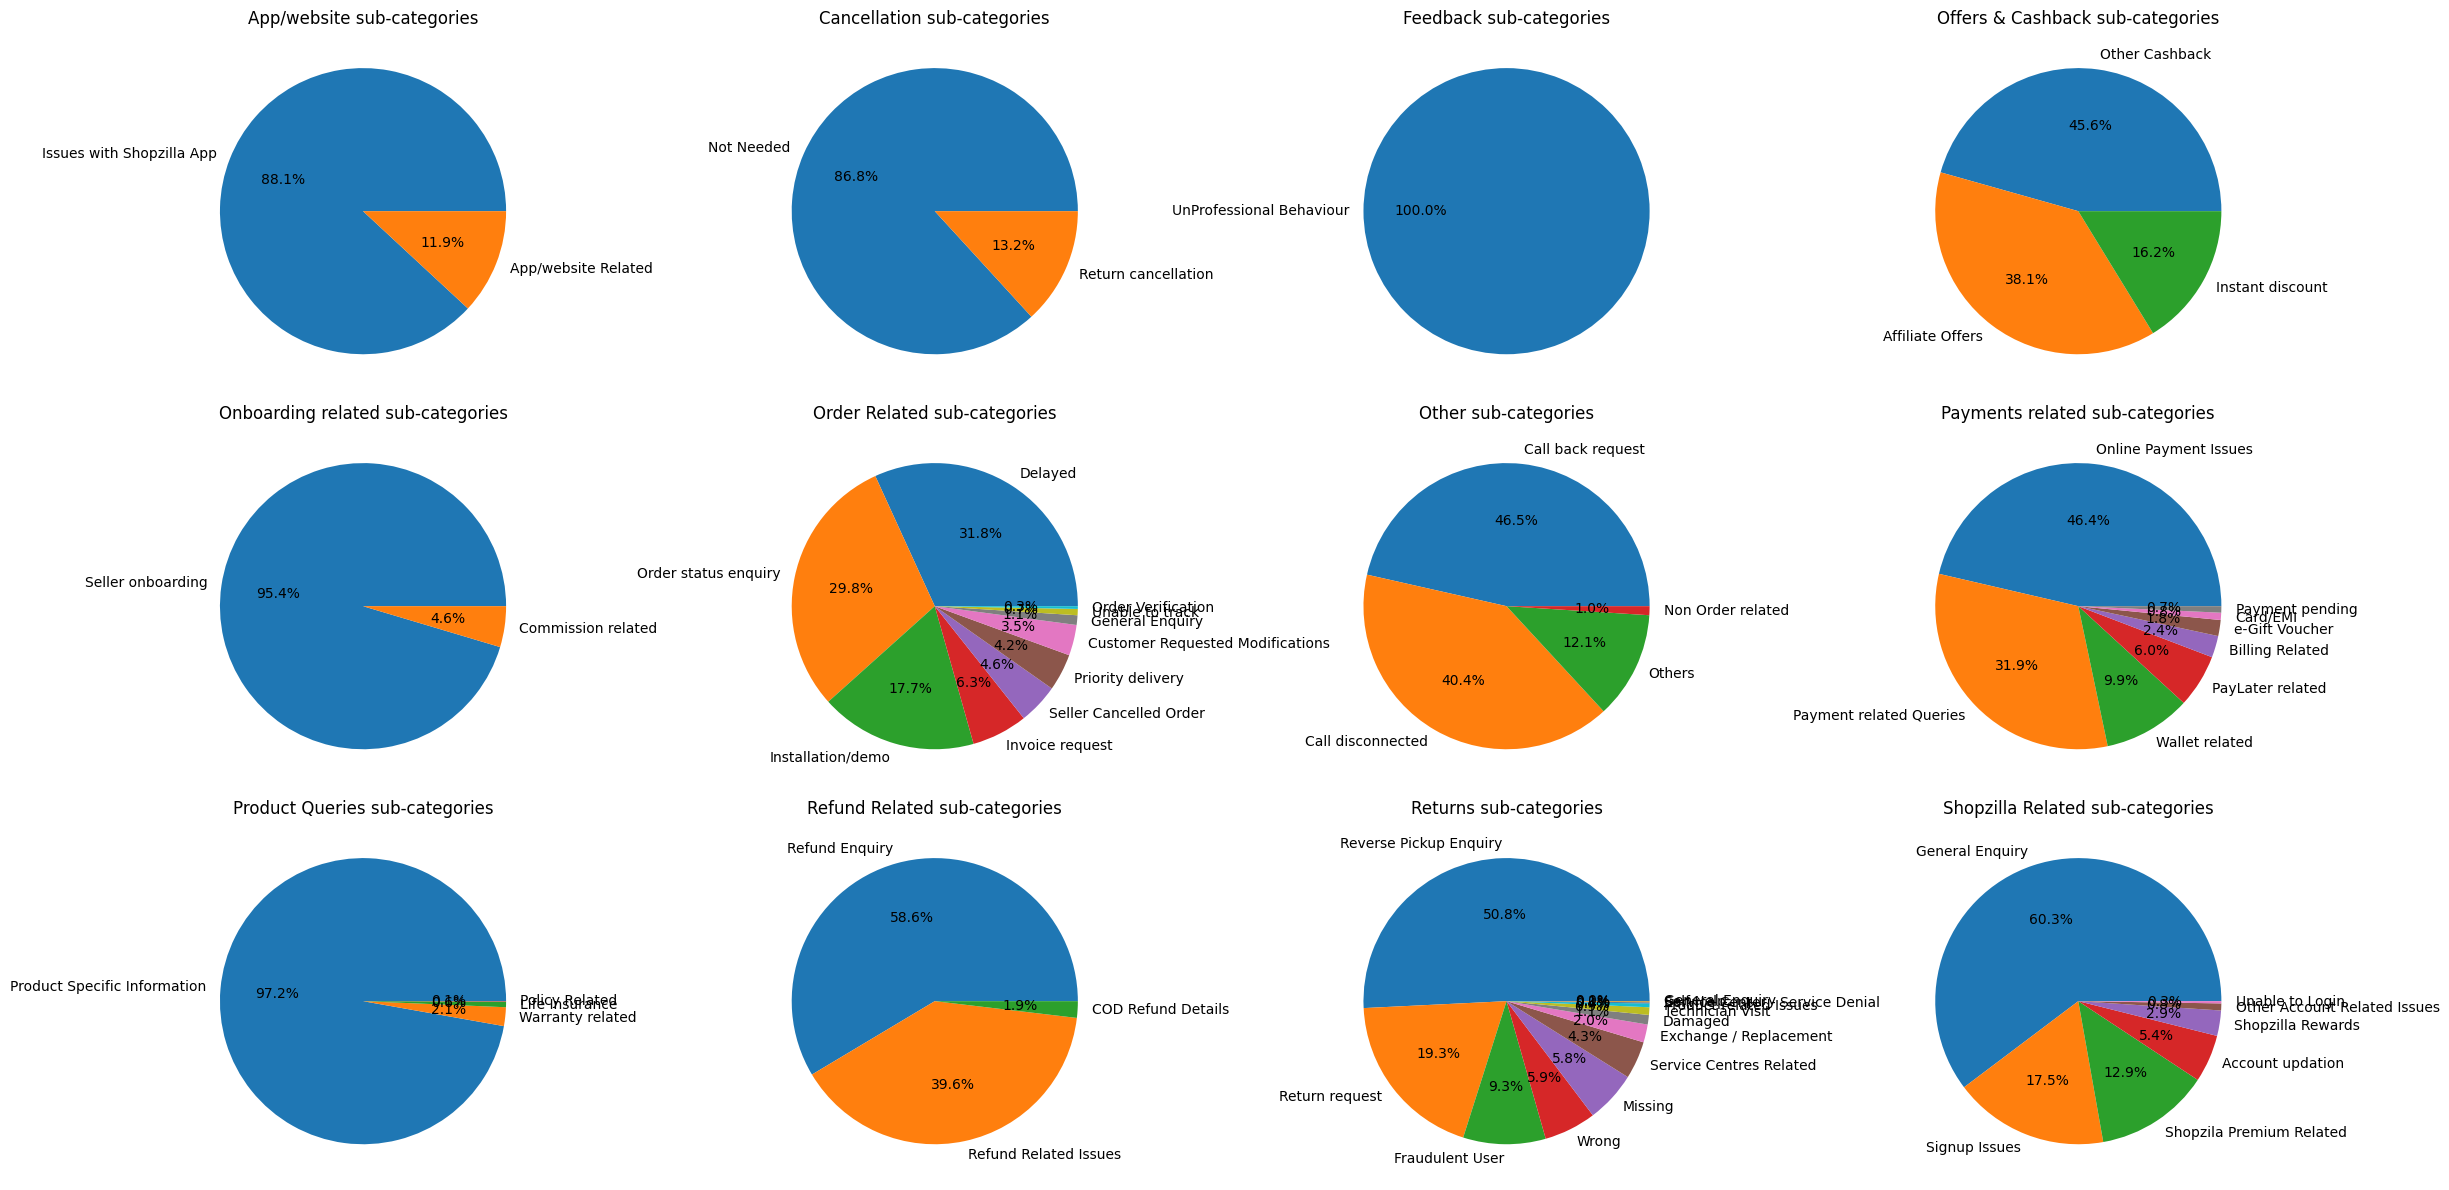

In [ ]:
# Chart - 7 visualization code
fig, axes = plt.subplots(3, 4, figsize=(24, 12))

axes = axes.flatten()

axes[0].pie(sub_categories_data.loc['App/website'].values, labels = sub_categories_data.loc['App/website'].index, autopct = '%1.1f%%')
axes[0].set_title('App/website sub-categories')

axes[1].pie(sub_categories_data.loc['Cancellation'].values, labels = sub_categories_data.loc['Cancellation'].index, autopct = '%1.1f%%')
axes[1].set_title('Cancellation sub-categories')

axes[2].pie(sub_categories_data.loc['Feedback'].values, labels = sub_categories_data.loc['Feedback'].index, autopct = '%1.1f%%')
axes[2].set_title('Feedback sub-categories')

axes[3].pie(sub_categories_data.loc['Offers & Cashback'].values, labels = sub_categories_data.loc['Offers & Cashback'].index, autopct = '%1.1f%%')
axes[3].set_title('Offers & Cashback sub-categories')

axes[4].pie(sub_categories_data.loc['Onboarding related'].values, labels = sub_categories_data.loc['Onboarding related'].index, autopct = '%1.1f%%')
axes[4].set_title('Onboarding related sub-categories')

axes[5].pie(sub_categories_data.loc['Order Related'].values, labels = sub_categories_data.loc['Order Related'].index, autopct = '%1.1f%%')
axes[5].set_title('Order Related sub-categories')

axes[6].pie(sub_categories_data.loc['Others'].values, labels = sub_categories_data.loc['Others'].index, autopct = '%1.1f%%')
axes[6].set_title('Other sub-categories')

axes[7].pie(sub_categories_data.loc['Payments related'].values, labels = sub_categories_data.loc['Payments related'].index, autopct = '%1.1f%%')
axes[7].set_title('Payments related sub-categories')

axes[8].pie(sub_categories_data.loc['Product Queries'].values, labels = sub_categories_data.loc['Product Queries'].index, autopct = '%1.1f%%')
axes[8].set_title('Product Queries sub-categories')

axes[9].pie(sub_categories_data.loc['Refund Related'].values, labels = sub_categories_data.loc['Refund Related'].index, autopct = '%1.1f%%')
axes[9].set_title('Refund Related sub-categories')

axes[10].pie(sub_categories_data.loc['Returns'].values, labels = sub_categories_data.loc['Returns'].index, autopct = '%1.1f%%')
axes[10].set_title('Returns sub-categories')

axes[11].pie(sub_categories_data.loc['Shopzilla Related'].values, labels = sub_categories_data.loc['Shopzilla Related'].index, autopct = '%1.1f%%')
axes[11].set_title('Shopzilla Related sub-categories')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To see the proportions of sub-categories and major sub-categories in each category.

##### 2. What is/are the insight(s) found from the chart?

Feedback category has only one sub-category UnProfessional Behaviour.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight showing proportions of sub-categories and major sub-categories in each category.

#### Chart - 8

In [ ]:
analysis_data.groupby('channel_name')['csat_score'].mean().round(2)

,csat_score
channel_name,
Email,3.90
Inbound,4.25
Outcall,4.27


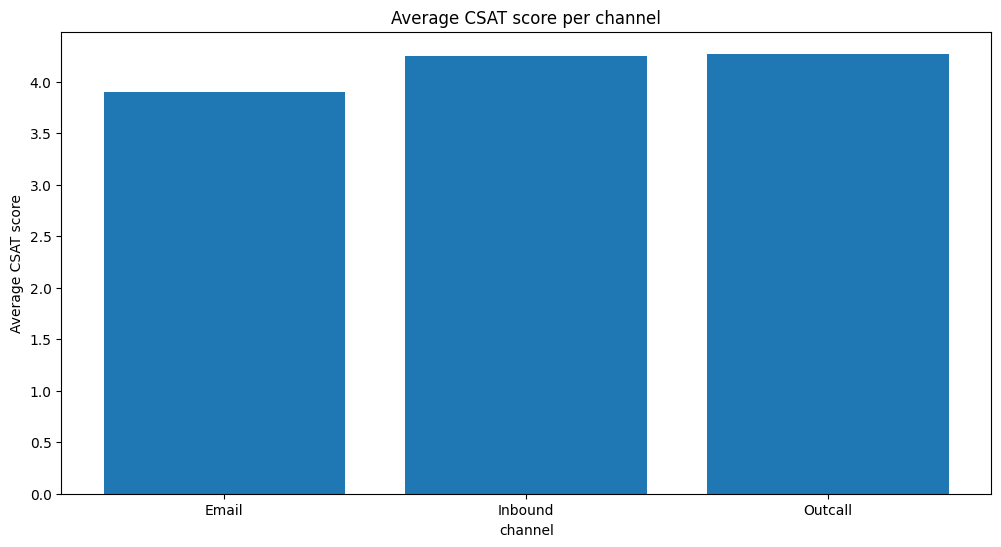

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (12,6))
plt.bar(analysis_data.groupby('channel_name')['csat_score'].mean().index, analysis_data.groupby('channel_name')['csat_score'].mean().round(2).values)
plt.xlabel('channel')
plt.ylabel('Average CSAT score')
plt.title('Average CSAT score per channel')
plt.show()

##### 1. Why did you pick the specific chart?

To see average CSAT score by channel.

##### 2. What is/are the insight(s) found from the chart?

Email channel has the lowest average CSAT score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight.

#### Chart - 9

In [ ]:
analysis_data.groupby('category')['csat_score'].mean().round(2)

,csat_score
category,
App/website,4.40
Cancellation,3.99
Feedback,4.16
Offers & Cashback,4.21
Onboarding related,4.26
Order Related,4.10
Others,3.43
Payments related,4.35
Product Queries,4.04


In [ ]:
analysis_data.groupby('tenure_bucket')['csat_score'].mean().round(2)

,csat_score
tenure_bucket,
0-30,4.26
31-60,4.30
61-90,4.35
>90,4.27
On Job Training,4.15


In [ ]:
analysis_data.groupby('agent_shift')['csat_score'].mean().round(2)

,csat_score
agent_shift,
Afternoon,4.29
Evening,4.28
Morning,4.19
Night,4.29
Split,4.43


In [ ]:
analysis_data.groupby('channel_name')['response_time'].mean().round(0)

,response_time
channel_name,
Email,243.0
Inbound,201.0
Outcall,202.0


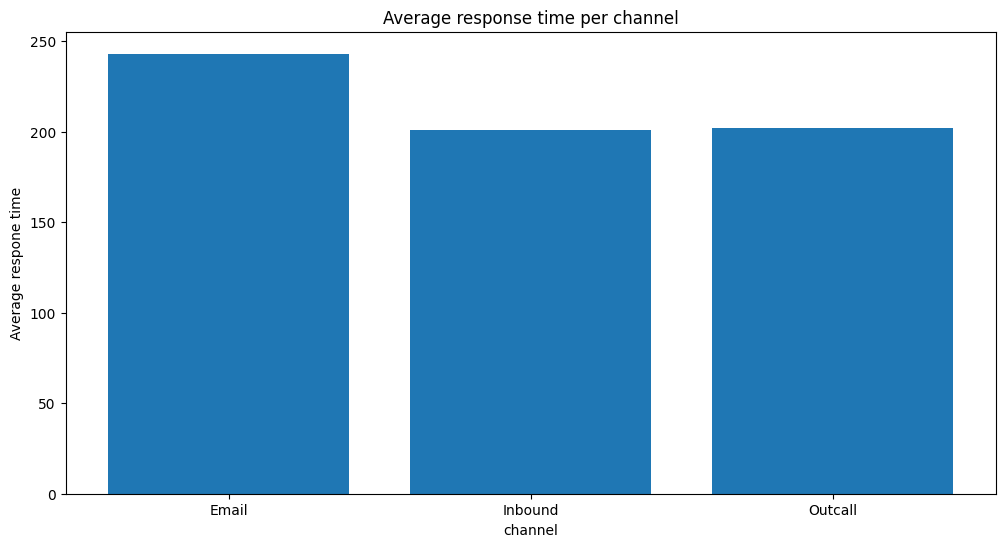

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (12,6))
plt.bar(analysis_data.groupby('channel_name')['response_time'].mean().index, analysis_data.groupby('channel_name')['response_time'].mean().round(0).values)
plt.xlabel('channel')
plt.ylabel('Average respone time')
plt.title('Average response time per channel')
plt.show()

##### 1. Why did you pick the specific chart?

To average response time per channel.

##### 2. What is/are the insight(s) found from the chart?

Email channel has the highest average response time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Email channel has the highest average response time. Something should be done to decrease it.

#### Chart - 10

In [ ]:
analysis_data.groupby('category')['response_time'].mean().round(0)

,response_time
category,
App/website,286.0
Cancellation,228.0
Feedback,217.0
Offers & Cashback,240.0
Onboarding related,219.0
Order Related,185.0
Others,278.0
Payments related,188.0
Product Queries,227.0


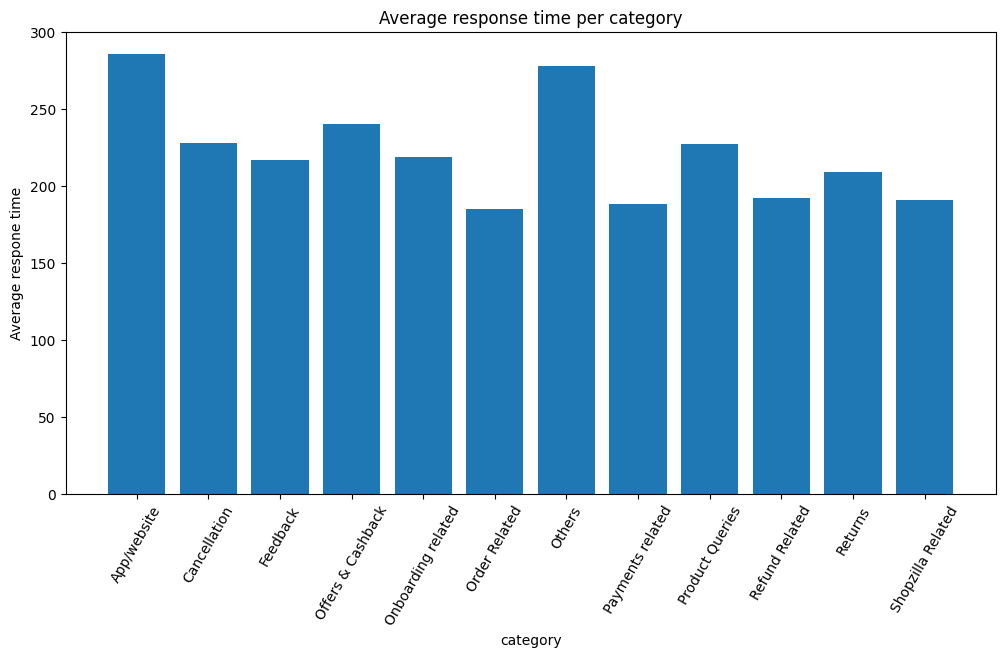

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (12,6))
plt.bar(analysis_data.groupby('category')['response_time'].mean().index, analysis_data.groupby('category')['response_time'].mean().round(0).values)
plt.xlabel('category')
plt.ylabel('Average respone time')
plt.title('Average response time per category')
plt.xticks(rotation = 60)
plt.show()

##### 1. Why did you pick the specific chart?

To see average response times by the issue category.

##### 2. What is/are the insight(s) found from the chart?

App/website related issues have the highest average response time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

App/website related issues have the highest average response time. It should be looked into.

#### Chart - 11

In [ ]:
analysis_data.groupby('tenure_bucket')['response_time'].mean().round(0)

,response_time
tenure_bucket,
0-30,183.0
31-60,176.0
61-90,196.0
>90,207.0
On Job Training,219.0


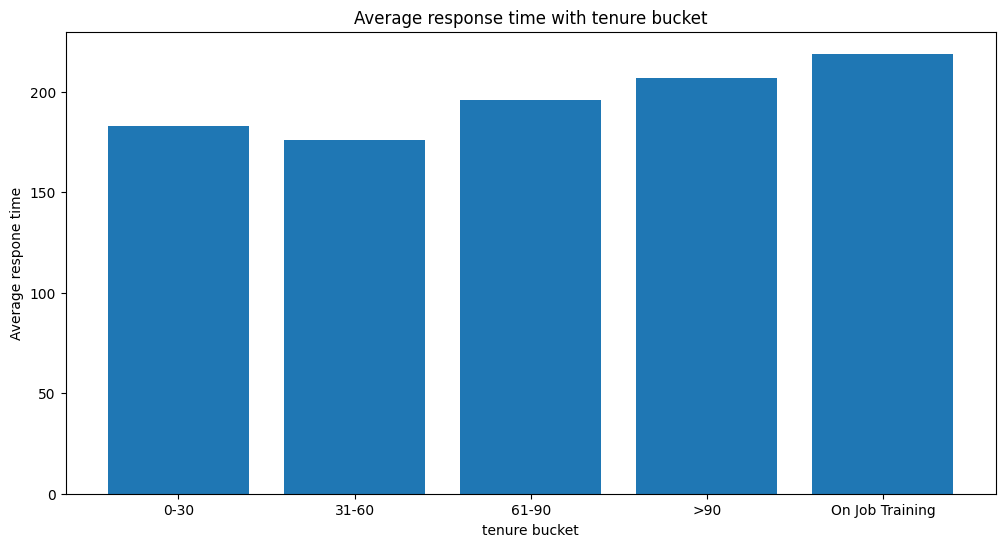

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize = (12,6))
plt.bar(analysis_data.groupby('tenure_bucket')['response_time'].mean().index, analysis_data.groupby('tenure_bucket')['response_time'].mean().round(0).values)
plt.xlabel('tenure bucket')
plt.ylabel('Average respone time')
plt.title('Average response time with tenure bucket')
plt.show()

##### 1. Why did you pick the specific chart?

To see average response times with tenure buckets.

##### 2. What is/are the insight(s) found from the chart?

The agents with tenure more than 90 have the highest average response time. The average response time decreases from training upto 60 days at job, after that it increases. This should be looked into.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The company should do a performance check on its agents and try to improve it for agents with long tenures especially for people with tenure greater than 60 days.

#### Chart - 12

In [ ]:
analysis_data.groupby('agent_shift')['response_time'].mean().round(0)

,response_time
agent_shift,
Afternoon,226.0
Evening,203.0
Morning,199.0
Night,214.0
Split,204.0


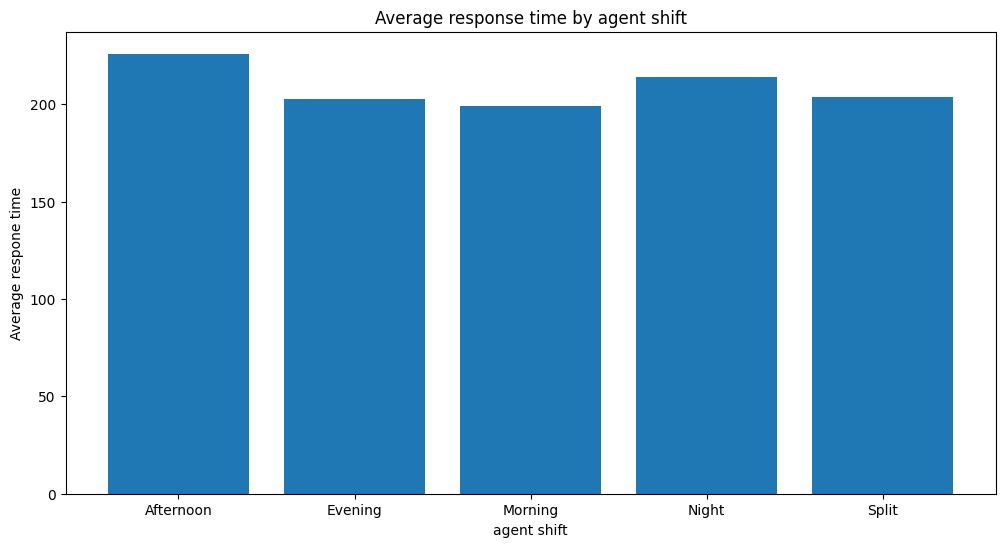

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (12,6))
plt.bar(analysis_data.groupby('agent_shift')['response_time'].mean().index, analysis_data.groupby('agent_shift')['response_time'].mean().round(0).values)
plt.xlabel('agent shift')
plt.ylabel('Average respone time')
plt.title('Average response time by agent shift')
plt.show()

##### 1. Why did you pick the specific chart?

To see average response time by agent shift.

##### 2. What is/are the insight(s) found from the chart?

The agents in the morning have the lowest average response time while the agents in the afternoon have the highest average response time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This is an informative insight.

#### Chart - 13

In [ ]:
analysis_data.groupby('csat_score')['response_time'].mean().round(0)

,response_time
csat_score,
1,397.0
2,330.0
3,255.0
4,186.0
5,164.0


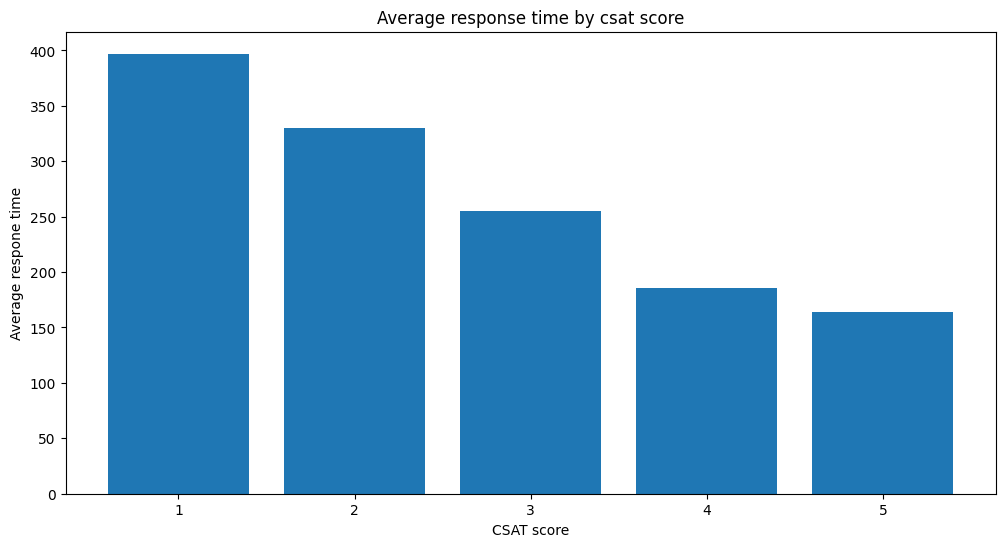

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize = (12,6))
plt.bar(analysis_data.groupby('csat_score')['response_time'].mean().index, analysis_data.groupby('csat_score')['response_time'].mean().round(0).values)
plt.xlabel('CSAT score')
plt.ylabel('Average respone time')
plt.title('Average response time by csat score')
plt.show()

##### 1. Why did you pick the specific chart?

To see the average response time by the CSAT score.

##### 2. What is/are the insight(s) found from the chart?

As the CSAT score increases, the average response time decreases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows the significance of response time in influencing CSAT score. The interactions with less response time will get high CSAT score. That means if the business wants to improve its average CSAT score, it should focus on reducing average response time as much as possible.

#### Chart - 14 - Correlation Heatmap

<Axes: >

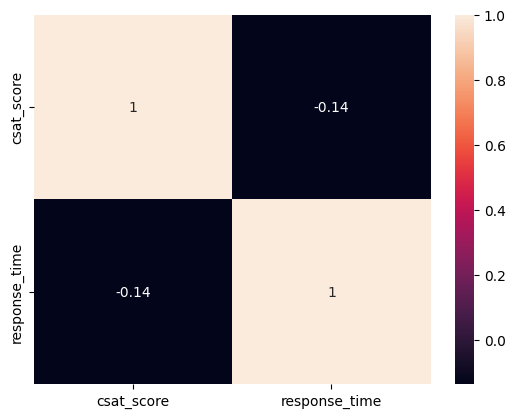

In [ ]:
# Correlation Heatmap visualization code
corr = analysis_data.corr(numeric_only = True)
sns.heatmap(corr, annot = True)

##### 1. Why did you pick the specific chart?

To see correlation between numeric values.

##### 2. What is/are the insight(s) found from the chart?

CSAT Score and response time have a negative and weak correlation. This is worth further building upon.

#### Chart - 15 - Pair Plot

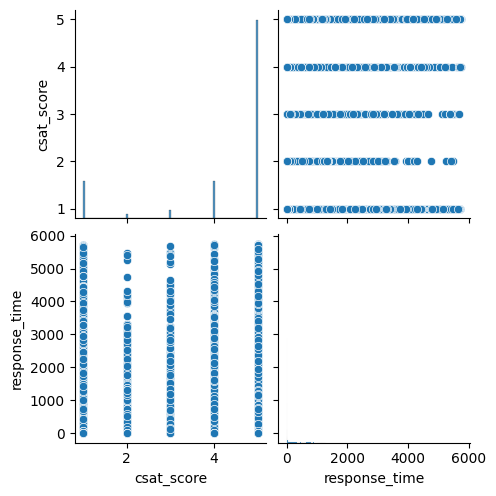

In [ ]:
# Pair Plot visualization code
sns.pairplot(analysis_data)

##### 1. Why did you pick the specific chart?

To see the relationships between numeric variables.

##### 2. What is/are the insight(s) found from the chart?

There doesn't seem to be clear relationship between CSAT score and response times from the pair plots. Basically we need to investigate further to conclude something strong.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

From my chart experiments, I derived 3 hypothetical statements:
1. The PDF of response times is log-normal.
1. The increasing response time has a decreasing effect on CSAT score.
1. The agents whose tenure is more than 60 days is more likely to have a response time greater than agents on training.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - The PDF of response times is log-normal.

Alternate Hypothesis - The PDF of response times is not log-normal.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import kstest, lognorm

data = analysis_data['response_time']

# Fit the log-normal distribution to the data
shape, loc, scale = lognorm.fit(data, floc=0)  # Estimate parameters

# Perform the one-sample K-S test
D, p_value = kstest(data, 'lognorm', args=(shape, loc, scale))

# Print results
print(f"K-S Statistic: {D}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: The data do not follow a log-normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data follow a log-normal distribution.")

K-S Statistic: 0.14082036255967229
P-value: 0.0
Reject the null hypothesis: The data do not follow a log-normal distribution.


##### Which statistical test have you done to obtain P-Value?

one-sample K-S test

##### Why did you choose the specific statistical test?

The Kolmogorov-Smirnov (K-S) test is a non-parametric statistical test used to compare a sample distribution with a theoretical distribution (one-sample K-S test) or to compare two sample distributions (two-sample K-S test). In my case, I will be doing the one-sample K-S test to determine whether the response times follow a log-normal distribution, since I have a sample of response times and I have to test whether they follow log-normal distribution.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - The response time doesn't have an effect on CSAT score.

Alternate Hypothesis - The increasing response time has a decreasing effect on CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import spearmanr

response_time = analysis_data['response_time'] # Response times in seconds
csat_score = analysis_data['csat_score']  # CSAT scores (ordinal)

# Calculate Spearman's rank correlation
rho, p_value = spearmanr(response_time, csat_score, alternative='greater')  # 'greater' for one-tailed test

# Display results
print(f"Spearman's correlation coefficient (ρ): {rho}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is evidence that longer response times decrease CSAT scores.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that response time affects CSAT scores.")

Spearman's correlation coefficient (ρ): -0.17127927569449947
P-value: 1.0
Fail to reject the null hypothesis: No significant evidence that response time affects CSAT scores.


##### Which statistical test have you done to obtain P-Value?

Spearman's Rank Correlation(one-tailed)

##### Why did you choose the specific statistical test?

Spearman's Rank Correlation is a non-parametric statistical test that measures the strength and direction of the monotonic relationship between two variables. Unlike Pearson's correlation, which assumes a linear relationship and normally distributed data, Spearman's correlation works with ranked data and is suitable for testing relationships that may not be linear but monotonic (e.g., consistently increasing or decreasing). Since the CSAT score here is ordinal, it is more appropriate to use Spearman's Rank Correlation.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - The tenure of agents doesn't influence the likelihood of agent having high or low response time that much. The observed pattern is just a random noise not a defined trend.

Alternate Hypothesis - The agents whose tenure is more than 60 days is more likely to have a response time greater than agents in their first 60 days excluding training period.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import mannwhitneyu

response_time_tenure_le_60 = analysis_data.loc[analysis_data['tenure_bucket'].isin(['61-90', '>90']), 'response_time']  # Response times for tenure ≤ 60 days
response_time_tenure_gt_60 = analysis_data.loc[analysis_data['tenure_bucket'].isin(['31-60', '0-30']), 'response_time']  # Response times for tenure > 60 days

# Perform the Mann-Whitney U test (one-tailed, alternative='greater')
stat, p_value = mannwhitneyu(response_time_tenure_le_60, response_time_tenure_gt_60, alternative='greater')

# Display results
print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Agents with longer tenure have higher response times.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that longer tenure leads to higher response times.")

Mann-Whitney U statistic: 442423213.5
P-value: 5.510783632967303e-10
Reject the null hypothesis: Agents with longer tenure have higher response times.


##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U Test

##### Why did you choose the specific statistical test?

The Mann-Whitney U test (also known as the Wilcoxon rank-sum test) is suitable for comparing response times between two independent groups when:
* The response time data may not follow a normal distribution.
* We have two independent groups (tenure ≤60 days vs. tenure >60 days).
* The test doesn't assume equal variances.

It is a non-parametric test that compares the distributions of two groups and is ideal if you cannot assume normality.



## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
modeling_data = analysis_data.copy()

In [ ]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   channel_name   85907 non-null  object
 1   category       85907 non-null  object
 2   sub_category   85907 non-null  object
 3   tenure_bucket  85907 non-null  object
 4   agent_shift    85907 non-null  object
 5   csat_score     85907 non-null  int64 
 6   response_time  85907 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 4.6+ MB


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
modeling_data.isna().sum()

,0
channel_name,0
category,0
sub_category,0
tenure_bucket,0
agent_shift,0
csat_score,0
response_time,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Since there are no values left, there is no need to do any modification.

### 2. Handling Outliers

<Axes: ylabel='response_time'>

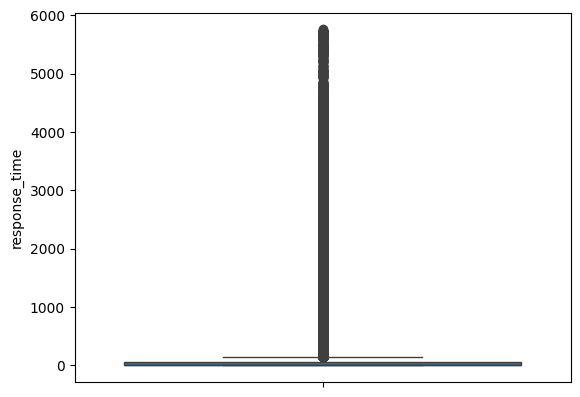

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(modeling_data['response_time'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since there are outliers but they don't get very far from the main distribution, I will retain the outliers.

### 3. Categorical Encoding

In [ ]:
modeling_data['channel_name'].unique()

array(['Outcall', 'Inbound', 'Email'], dtype=object)

In [ ]:
modeling_data['tenure_bucket'].unique()

array(['On Job Training', '>90', '0-30', '31-60', '61-90'], dtype=object)

In [ ]:
modeling_data['agent_shift'].unique()

array(['Morning', 'Evening', 'Split', 'Afternoon', 'Night'], dtype=object)

In [ ]:
modeling_data['category'].unique()

array(['Product Queries', 'Order Related', 'Returns', 'Cancellation',
       'Shopzilla Related', 'Payments related', 'Refund Related',
       'Feedback', 'Offers & Cashback', 'Onboarding related', 'Others',
       'App/website'], dtype=object)

In [ ]:
modeling_data['sub_category'].unique()

array(['Life Insurance', 'Product Specific Information',
       'Installation/demo', 'Reverse Pickup Enquiry', 'Not Needed',
       'Fraudulent User', 'Exchange / Replacement', 'Missing',
       'General Enquiry', 'Return request', 'Delayed',
       'Service Centres Related', 'Payment related Queries',
       'Order status enquiry', 'Return cancellation', 'Unable to track',
       'Seller Cancelled Order', 'Wrong', 'Invoice request',
       'Priority delivery', 'Refund Related Issues', 'Signup Issues',
       'Online Payment Issues', 'Technician Visit',
       'UnProfessional Behaviour', 'Damaged', 'Product related Issues',
       'Refund Enquiry', 'Customer Requested Modifications',
       'Instant discount', 'Card/EMI', 'Shopzila Premium Related',
       'Account updation', 'COD Refund Details', 'Seller onboarding',
       'Order Verification', 'Other Cashback', 'Call disconnected',
       'Wallet related', 'PayLater related', 'Call back request',
       'Other Account Related Issues

In [ ]:
channel_map = {'Inbound':0, 'Email':1, 'Outcall':2}
tenure_map = {'On Job Training':0, '0-30':1, '31-60':2, '61-90':3, '>90':4}
shift_map = {'Morning':0, 'Afternoon':1, 'Evening':2, 'Night':3, 'Split':4}

In [ ]:
# Encode your categorical columns
modeling_data['channel_no'] = modeling_data['channel_name'].map(channel_map)
modeling_data['tenure_no'] = modeling_data['tenure_bucket'].map(tenure_map)
modeling_data['shift_no'] = modeling_data['agent_shift'].map(shift_map)

In [ ]:
modeling_data['complete_categorization'] = modeling_data['category'] + '_' + modeling_data['sub_category']

In [ ]:
modeling_data['complete_categorization'].value_counts()

,count
complete_categorization,
Returns _ Reverse Pickup Enquiry,22389
Returns _ Return request,8523
Order Related _ Delayed,7388
Order Related _ Order status enquiry,6922
Order Related _ Installation/demo,4116
Returns _ Fraudulent User,4108
Product Queries _ Product Specific Information,3589
Refund Related _ Refund Enquiry,2665
Returns _ Wrong,2597


In [ ]:
# Label encoding for the complete categorization
ordinal_encoder = OrdinalEncoder()
modeling_data['category_code'] = ordinal_encoder.fit_transform(modeling_data[['complete_categorization']])
modeling_data['category_code'] = modeling_data['category_code'].astype(int)
modeling_data['category_code'].value_counts()

,count
category_code,
46,22389
45,8523
11,7388
16,6922
13,4116
41,4108
34,3589
37,2665
51,2597


In [ ]:
modeling_data['category_code'].max()

58

In [ ]:
modeling_data['category_code'].min()

0

#### What all categorical encoding techniques have you used & why did you use those techniques?

I going to use ordinal encoding for the columns channel_name, tenure_bucket and agent_shift because they have an intrinsic order in them.

Ordinal encoding for channel_name:
* 'Inbound':0
* 'Email':1
* 'Outcall':2

Ordinal encoding for tenure_bucket:
* 'On Job Training':0
* '0-30':1
* '31-60':2
* '61-90':3
* '>90':4

Ordinal encoding for agent_shift:
* 'Morning':0
* 'Afternoon':1
* 'Evening':2
* 'Night':3
* 'Split':4

I will be adding category and sub_category variables to create a variable which denotes complete categorization and then encode that derived variable. This will lead to better and efficient encoding. I will use label encoding for this because there is no inherent order here.

### 4. Feature Manipulation & Selection

There is no need of feature selection since I'm already taking 5-6 features and so dimensionality curse is not present. Also if I do selection here, I will rather be losing information and model accuracy will suffer.

Since the features here are rather simple with only one float feature and others being categorical, there is no need for feature manipulation except for one, csat score. If I take csat score as it is, then I get a multi-class classification problem with 5 classes, which is quite complicated. From the pie chart of csat score, it is clear that most of the interactions have 5 score, the maximum score, that means the customer was completely satisfied with the service. 1 and 4 have less numbers and 2 and 3 have a very less numbers. Making the model learn to predict these is going too deep and complicating things. I will apply here Feature binning. My feature binning scheme is:
* csat_score = 5 -- satisfactory service -- superviser doesn't need to advice the service agent. They did their job perfectly -- **1**
* 1 <= csat_score <= 4 -- can be improved upon -- superviser needs to guide the service agents to improve their service. -- **0**

I will be using this binned feature as the target varible instead of csat_score. This way, I have converted this 5-class classification into binary classification where the class imbalance is little bit less than the previous unmanipulated case. This leads to huge simplification, making sure that the models will have better performance.

In [ ]:
modeling_data['csat_score_bin'] = np.where(modeling_data['csat_score'] == 5, 1, 0)

In [ ]:
modeling_data['csat_score_bin'].value_counts()

,count
csat_score_bin,
1,59617
0,26290


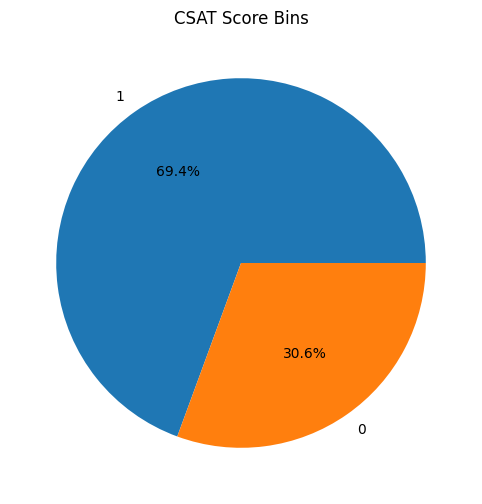

In [ ]:
plt.figure(figsize = (12,6))
plt.pie(modeling_data['csat_score_bin'].value_counts(), labels = modeling_data['csat_score_bin'].value_counts().index, autopct = '%1.1f%%')
plt.title('CSAT Score Bins')
plt.show()

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

response_time feature needs to be transformed. It has a very long but is centered around very low values. It is very far from normal distribution. Machine Learning models work best when the variables are distributed normally. I will using log transformation on response_time. Even though response_time is not log-normal which will be an ideal case, giving us a normal distribution, it will give us a distribution which is more centered in the center of the range, with lower range and more closer to normal distribution.  

In [ ]:
# Transform Your data
modeling_data['response_time_log'] = np.log(modeling_data['response_time'])

<ipython-input-98-42dca6715868>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(modeling_data['response_time_log'], shade = True)


<Axes: xlabel='response_time_log', ylabel='Density'>

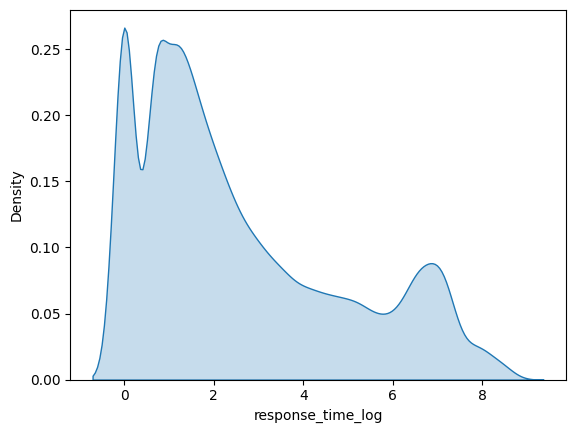

In [ ]:
sns.kdeplot(modeling_data['response_time_log'], shade = True)

### 6. Data Scaling

In [ ]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   channel_name             85907 non-null  object 
 1   category                 85907 non-null  object 
 2   sub_category             85907 non-null  object 
 3   tenure_bucket            85907 non-null  object 
 4   agent_shift              85907 non-null  object 
 5   csat_score               85907 non-null  int64  
 6   response_time            85907 non-null  int64  
 7   channel_no               85907 non-null  int64  
 8   tenure_no                85907 non-null  int64  
 9   shift_no                 85907 non-null  int64  
 10  complete_categorization  85907 non-null  object 
 11  category_code            85907 non-null  int64  
 12  csat_score_bin           85907 non-null  int64  
 13  response_time_log        85907 non-null  float64
dtypes: float64(1), int64(7

In [ ]:
# Scaling your data
minmax_scaler = MinMaxScaler()
modeling_data['scaled_channel_no'] = minmax_scaler.fit_transform(modeling_data[['channel_no']])
modeling_data['scaled_tenure_no'] = minmax_scaler.fit_transform(modeling_data[['tenure_no']])
modeling_data['scaled_shift_no'] = minmax_scaler.fit_transform(modeling_data[['shift_no']])
modeling_data['scaled_category_code'] = minmax_scaler.fit_transform(modeling_data[['category_code']])
modeling_data['scaled_response_time_log'] = minmax_scaler.fit_transform(modeling_data[['response_time_log']])

##### Which method have you used to scale you data and why?

I used Min-Max scaling to scale the data, because most of the data is categorical with only one variable continous, i.e. response_time. So, the modeling data is very simple and min-max scaling being a simple method is apt for this data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed because the number of dimensions is not much. There are only 5 dimensions.

### 8. Data Splitting

In [ ]:
features = ['scaled_channel_no', 'scaled_tenure_no', 'scaled_shift_no', 'scaled_category_code', 'scaled_response_time_log']
target = ['csat_score_bin']
X = modeling_data[features]
y = modeling_data[target]

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why?

I'm using 80%-20% split(80% data for training and 20% data for validation), based on the intuition. This split should neatly divide the number of rows present in the data after cleansing. This is one of the most recommended splits.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, even the dataset is imbalanced very highly as is evident from the pie chart of CSAT scores(chart 5), when we consider the CSAT score directly, it becomes 70% for majority class and 30% for minority class, when I use CSAT score bin as the target, converting the problem into binary classification. 70%-30% imbalance is not so drastic as to ensue use of data balancing techniques. The data balancing techniques have their own drawbacks and should be used when absolutely needed.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
knn.fit(X_train, y_train)

# Predict on the model
y_pred = knn.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Nearest Neighbours(k-NN) is a supervised learning algorithm used for both classification and regression. It takes in the consideration, the k nearest neighbours of a point. This k is not fixed, it is a hyperparameter. We can optimize k using hyperparameter tuning. When used for regression for regression, the value at point is the average of k nearest neighbours. When used for classification, the class of the point is decided by the majority vote of k nearest nieghbours. It is one of the simplest supervised learning algorithms.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.24      0.29      5248
           1       0.71      0.83      0.77     11934

    accuracy                           0.65     17182
   macro avg       0.55      0.53      0.53     17182
weighted avg       0.61      0.65      0.62     17182



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_neighbors': range(1, 33)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_pred = grid_search.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
print(classification_report(y_test, y_pred))
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

              precision    recall  f1-score   support

           0       0.44      0.11      0.18      5248
           1       0.71      0.94      0.81     11934

    accuracy                           0.69     17182
   macro avg       0.58      0.52      0.49     17182
weighted avg       0.63      0.69      0.61     17182

Best parameters: {'n_neighbors': 29}
Best score: 0.6872899236085849


##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV for hyperparameter optimization because it simple and searches exhaustively. Since K-NN is quite straight-forward, using Grid Search CV is apt.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is improvement from hyperparameter tuning. There is an increase in accuracy of 0.04 and there is a negligible decrease of 0.01 in weighted F1-score.

### ML Model - 2

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
y_pred = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression is a simple algorithm. It is pretty much linear. Basically, in logistic regression, we do linear regression on the features and then feed the result of this regression to logistic function, which gives this regression its name. The logistic function always produces a value in between 0 and 1. This value determines the probabliity of the point belonging to a class. If this is greater than a certain threshold, say 0.5, then we assign the point to the considered class. Logistic Regression is a supervised algorithm used only in classification. It is basically classification version of linear regression, a supervised algorithm used only in regression. Just like Linear regression, Logistic regression also has regularization options available(L1, L2, Elastic-Net).

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.03      0.05      5248
           1       0.70      0.99      0.82     11934

    accuracy                           0.70     17182
   macro avg       0.62      0.51      0.44     17182
weighted avg       0.65      0.70      0.58     17182



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
params = {'C':[1.0, 0.5, 2.0, 0.2, 5.0], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'penalty':['l1', 'l2', 'elasticnet'], 'max_iter':[100], 'tol':[1e-4, 1e-3]}

lr = LogisticRegression()

lr_grid_search = GridSearchCV(estimator = lr, param_grid = params, cv = 5)
# Fit the Algorithm
lr_grid_search.fit(X_train, y_train)

# Predict on the model
y_pred = lr_grid_search.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
print(classification_report(y_test, y_pred))
print(f"Best parameters: {lr_grid_search.best_params_}")
print(f"Best score: {lr_grid_search.best_score_}")

              precision    recall  f1-score   support

           0       0.55      0.03      0.05      5248
           1       0.70      0.99      0.82     11934

    accuracy                           0.70     17182
   macro avg       0.62      0.51      0.43     17182
weighted avg       0.65      0.70      0.58     17182

Best parameters: {'C': 0.2, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cholesky', 'tol': 0.001}
Best score: 0.693794106947981


##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV here because it does an exhaustive search of hyperparameters and the number of hyperparameters here is less.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, I have seen improvement on hyperparameter tuning.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)

# Fit the Algorithm
rf.fit(X_train, y_train)

# Predict on the model
y_pred = rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is an ensemble Tree method. In Random Forest, we construct many decision trees in the training from the data. It is a discriminative method as all Tree methods are. In Random Forest, we use bagging for combining Decision Trees, i.e., the class of a point is decided by the majority vote of the decision trees in the random forest. In a random forest, different decision trees are trained on different subsets of the data. This means Random Forest can be parallelized unlike gradient boosted trees such as XGBoost, which is why Random Forest is much faster.

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.23      0.30      5248
           1       0.72      0.85      0.78     11934

    accuracy                           0.66     17182
   macro avg       0.56      0.54      0.54     17182
weighted avg       0.62      0.66      0.63     17182



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators':range(5,101), 'min_samples_leaf':range(100,501), 'min_impurity_decrease':[0.0, 0.5, 1.0, 5.0, 10.0]}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, random_state = 42)
# Fit the Algorithm
rand_search.fit(X_train, y_train)

# Predict on the model
y_pred = rand_search.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [ ]:
print(classification_report(y_test, y_pred))
print(f"Best parameters: {rand_search.best_params_}")
print(f"Best score: {rand_search.best_score_}")
print("\n Here the result varies everytime, we execute, since we are using Randomized CV search. Generally the best model from last iterations is implemented as the current official model.")

              precision    recall  f1-score   support

           0       0.57      0.05      0.09      5248
           1       0.70      0.98      0.82     11934

    accuracy                           0.70     17182
   macro avg       0.63      0.52      0.46     17182
weighted avg       0.66      0.70      0.60     17182

Best parameters: {'n_estimators': 6, 'min_samples_leaf': 108, 'min_impurity_decrease': 0.0}
Best score: 0.6969952710076391

 Here the result varies everytime, we execute, since we are using Randomized CV search. Generally the best model from last iterations is implemented as the current official model.


##### Which hyperparameter optimization technique have you used and why?

I have used Randomized Search CV for hyperparameter tuning because the number of parameters here is much large and Grid Search CV will take too much time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is improvement from hyperparameter tuning in accuracy of 0.04.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have considered the Evaluation Metrics of weighted average of F1-score and accuracy. I have chosen F1-score since I give importance to both precision and sensitivity. I have taken weighted average because I want to focus on the overall performance of the model across all classes. Wieghted F1-score gives the most sense in an imbalanced data. And I have also chosed accuracy because it is a simple starighforward metric.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen the Random Forest for my final prediction model because it achieves best accuracy. Even though logistic Regression also achieves the same best accuracy of 0.7 but the Random Forest achieves a better weighted F1-score.

In [ ]:
official_model = RandomForestClassifier(n_estimators = 64, min_samples_leaf = 128, random_state = 42)
official_model.fit(X_train, y_train)
ypred = official_model.predict(X_test)
print(classification_report(y_test, ypred))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.56      0.04      0.08      5248
           1       0.70      0.98      0.82     11934

    accuracy                           0.70     17182
   macro avg       0.63      0.51      0.45     17182
weighted avg       0.66      0.70      0.59     17182



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Random Forest is an ensemble Tree method. In Random Forest, we construct many decision trees in the training from the data. It is a discriminative method as all Tree methods are. In Random Forest, we use bagging for combining Decision Trees, i.e., the class of a point is decided by the majority vote of the decision trees in the random forest. In a random forest, different decision trees are trained on different subsets of the data. This means Random Forest can be parallelized unlike gradient boosted trees such as XGBoost, which is why Random Forest is much faster.

I will be showing the feature importance by using built-in feature importance that we have in scikit learn for Tree models.

In [ ]:
feature_importances = pd.DataFrame({'feature':['channel_no', 'tenure_no', 'shift_no', 'category_code', 'response_time_log'], 'importance(%)':official_model.feature_importances_*100})
print(f"The feature importances(%) according to the official model are:\n{feature_importances}")

The feature importances(%) according to the officail model are:
             feature  importance(%)
0         channel_no       1.747885
1          tenure_no       6.543972
2           shift_no       3.811234
3      category_code      30.627291
4  response_time_log      57.269619


**The model's feature importance table shows that the most important things for a good rating is that for a particular category of query, the response time should be in particular limit(Should not exceed a particular threshold).**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
# Save the File
with open('official_model.pkl', 'wb') as file:
    pickle.dump(official_model, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

In [ ]:
channel_map = {'Inbound':0, 'Email':1, 'Outcall':2}
tenure_map = {'On Job Training':0, '0-30':1, '31-60':2, '61-90':3, '>90':4}
shift_map = {'Morning':0, 'Afternoon':1, 'Evening':2, 'Night':3, 'Split':4}

def preprocess_data(X):
    X['channel_no'] = X['channel_name'].map(channel_map)
    X['tenure_no'] = X['Tenure Bucket'].map(tenure_map)
    X['shift_no'] = X['Agent Shift'].map(shift_map)

    X['complete_categorization'] = X['category'] + ' _ ' + X['Sub-category']

    ordinal_encoder = OrdinalEncoder()
    X['category_code'] = ordinal_encoder.fit_transform(X[['complete_categorization']])
    X['category_code'] = X['category_code'].astype(int)

    X['issue_reported'] = pd.to_datetime(X['Issue_reported at'], dayfirst=True)
    X['issue_responded'] = pd.to_datetime(X['issue_responded'], dayfirst=True)
    X['response_time'] = ((X['issue_responded'] - X['issue_reported']) / np.timedelta64(1, 'm')).astype(int)
    X.loc[X['response_time'] < 0, 'response_time'] = X.loc[X['response_time'] < 0, 'response_time'] * -1
    X.loc[X['response_time'] == 0, 'response_time'] = 1
    X['response_time_log'] = np.log(X['response_time'])

    minmax_scaler = MinMaxScaler()
    X['scaled_channel_no'] = minmax_scaler.fit_transform(X[['channel_no']])
    X['scaled_tenure_no'] = minmax_scaler.fit_transform(X[['tenure_no']])
    X['scaled_shift_no'] = minmax_scaler.fit_transform(X[['shift_no']])
    X['scaled_category_code'] = minmax_scaler.fit_transform(X[['category_code']])
    X['scaled_response_time_log'] = minmax_scaler.fit_transform(X[['response_time_log']])

    features = ['scaled_channel_no', 'scaled_tenure_no', 'scaled_shift_no', 'scaled_category_code', 'scaled_response_time_log']
    return X[features]

In [ ]:
# Load the File and predict unseen data.
model_file = open('/content/official_model.pkl', 'rb')
model = pickle.load(model_file)
data = pd.read_csv('/content/Customer_support_data.csv')
preprocessed_data = preprocess_data(data)

In [ ]:
y_pred = model.predict(preprocessed_data)
y_pred_proba = model.predict_proba(preprocessed_data)

In [ ]:
data['prediction'] = y_pred
data['prediction_probability(1)'] = y_pred_proba[:,1]

In [ ]:
data.to_csv('results.csv')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, I worked on customer support data from Flipkart. The objective was to predict Customer Satisfaction Score(CSAT score) from the data. The CSAT score in data ranged from 1 to 5 natural numbers. It is basically a category denoted by cardinal numbers. So, I decided to go for classification. I started with multi-class classification. At first, I got bad results.

Then I simplified the problem into a binary classification by binning the CSAT score into 2 categories:
* 1 - CSAT = 5, satisfactory
* 0 - CSAT < 5, needs improvement

using this bin as the target variable. Then I got satisfactory results.

In both of my approaches, I tried 3 models:
1. KNN
2. Logistic Regression
3. Random Forest

For each, I did the implementation, training and optimization. Finally, in the second approach, I got the best results with Random Forest with 70% accuracy and 60% weighted F1-score. The main hyperparameters of this model are:

**RandomForestClassifier(n_estimators = 64, min_samples_leaf = 128, random_state = 42)**

Then, I concluded from the feature importances from this model that,

**the most important things for a good rating is that for a particular category of query, the response time should be in particular limit(Should not exceed a particular threshold).**

Finally, I also saved this model. Then also loaded this model and the data and with the help of a preprocessing function did predictions on the data for a model sanity check.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***